In [44]:
import pytz
import pandas as pd
import numpy as np
import datetime as dt


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 100
# help with layout
plt.rcParams.update({'figure.autolayout': True})


In [45]:
df = pd.read_csv('../data/reddit_dominion.csv')

In [46]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [47]:
df.shape

(7121, 4)

In [48]:
df.sort_values(by = ['created_utc'], inplace = True)

In [49]:
df.head()

,title,created_utc,full_link,num_comments
7105,"Dominion Deck Builder | Share, discuss and rate Dominion card combinations",1292565223,https://www.reddit.com/r/dominion/comments/en9hw/dominion_deck_builder_share_discuss_and_rate/,0
7106,Dominion: Cornucopia announced. Theme: Variety.,1295040872,https://www.reddit.com/r/dominion/comments/f2gt5/dominion_cornucopia_announced_theme_variety/,1
7109,Online Dominion,1296680348,https://www.reddit.com/r/dominion/comments/fe1r5/online_dominion/,3
7108,Looking for someone to play a multiple rounds,1297381276,https://www.reddit.com/r/dominion/comments/fj3la/looking_for_someone_to_play_a_multiple_rounds/,6
7107,The Secret History of the Dominion Cards (written by Donald X himself!),1299108955,https://www.reddit.com/r/dominion/comments/fw55j/the_secret_history_of_the_dominion_cards_written/,0


In [50]:
# Modified code from: https://stackoverflow.com/questions/52451105/python-converting-utc-millisecond-timestamp-to-local-time
def tz_from_utc_s_ts(utc_s_ts, tz_info):
    """Given second utc timestamp and a timezone return dateime

    :param utc_s_ts: Unix UTC timestamp in seconds
    :param tz_info: timezone info
    :return: timezone aware datetime
    """
    # convert from time stamp to datetime
    utc_datetime = dt.datetime.utcfromtimestamp(utc_s_ts)

    # set the timezone to UTC, and then convert to desired timezone
    return utc_datetime.replace(tzinfo=pytz.timezone('UTC')).astimezone(tz_info)

In [64]:
# Adding potentially useful columns
df['GMT_time'] = df['created_utc'].apply(lambda time_seconds: 
                                        tz_from_utc_s_ts(time_seconds, pytz.timezone('UTC')))
df['year'] = df['GMT_time'].apply(lambda date:  (date.strftime('%Y')))
df['month'] = df['GMT_time'].apply(lambda date:  (date.strftime('%m')))
df['day'] = df['GMT_time'].apply(lambda date:  (date.strftime('%d')))
df['hour'] = df['GMT_time'].apply(lambda date:  (date.strftime('%H')))

df['char_count'] = df['title'].apply(lambda text: len(text))
df['word_count'] = df['title'].apply(lambda text: len(text.split()))
med = df['num_comments'].median()
df['commments_greater'] = df['num_comments'].apply(lambda val: 1 if val > med else 0)



df.to_csv('../data/reddit_dominion_full.csv', index=False)
df.head()

,title,created_utc,full_link,num_comments,GMT_time,year,month,day,hour,char_count,word_count,commments_greater
7105,"Dominion Deck Builder | Share, discuss and rate Dominion card combinations",1292565223,https://www.reddit.com/r/dominion/comments/en9hw/dominion_deck_builder_share_discuss_and_rate/,0,2010-12-17 05:53:43+00:00,2010,12,17,05,74,11,0
7106,Dominion: Cornucopia announced. Theme: Variety.,1295040872,https://www.reddit.com/r/dominion/comments/f2gt5/dominion_cornucopia_announced_theme_variety/,1,2011-01-14 21:34:32+00:00,2011,01,14,21,47,5,0
7109,Online Dominion,1296680348,https://www.reddit.com/r/dominion/comments/fe1r5/online_dominion/,3,2011-02-02 20:59:08+00:00,2011,02,02,20,15,2,0
7108,Looking for someone to play a multiple rounds,1297381276,https://www.reddit.com/r/dominion/comments/fj3la/looking_for_someone_to_play_a_multiple_rounds/,6,2011-02-10 23:41:16+00:00,2011,02,10,23,45,8,0
7107,The Secret History of the Dominion Cards (written by Donald X himself!),1299108955,https://www.reddit.com/r/dominion/comments/fw55j/the_secret_history_of_the_dominion_cards_written/,0,2011-03-02 23:35:55+00:00,2011,03,02,23,71,12,0


In [53]:
df['commments_greater'].value_counts(normalize=True)

0    0.518607
1    0.481393
Name: commments_greater, dtype: float64

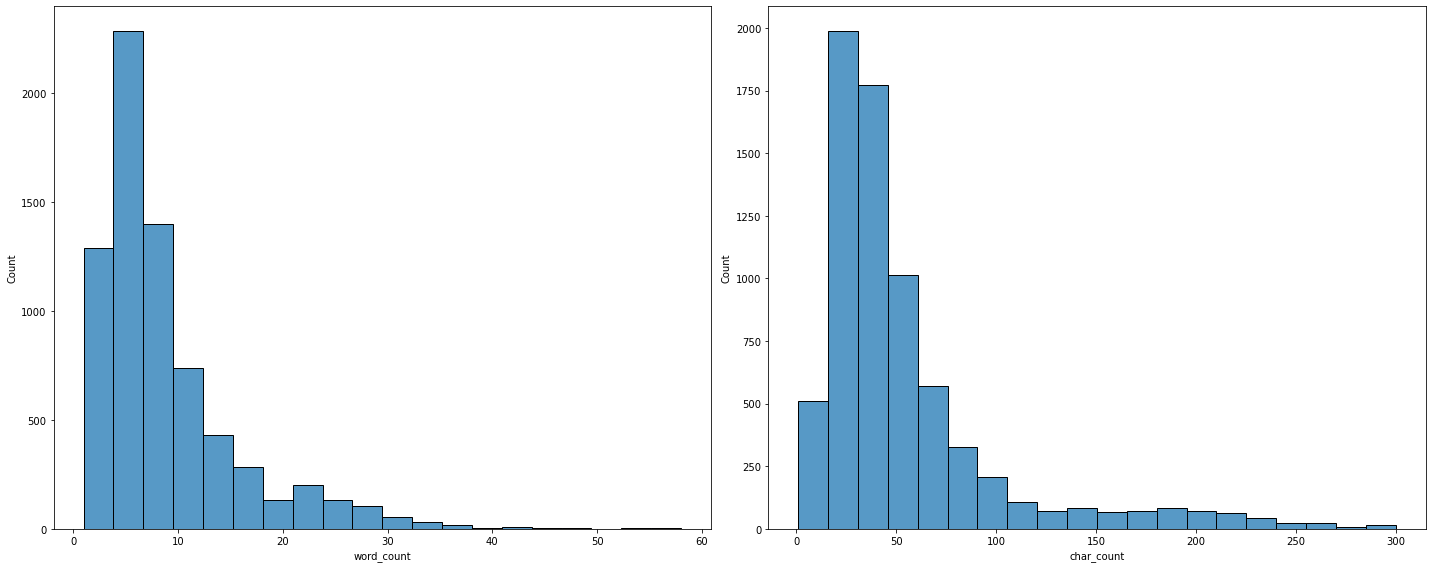

In [54]:
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.histplot(df['word_count'], ax=ax[0], bins = 20);
sns.histplot(df['char_count'], ax = ax[1], bins = 20);

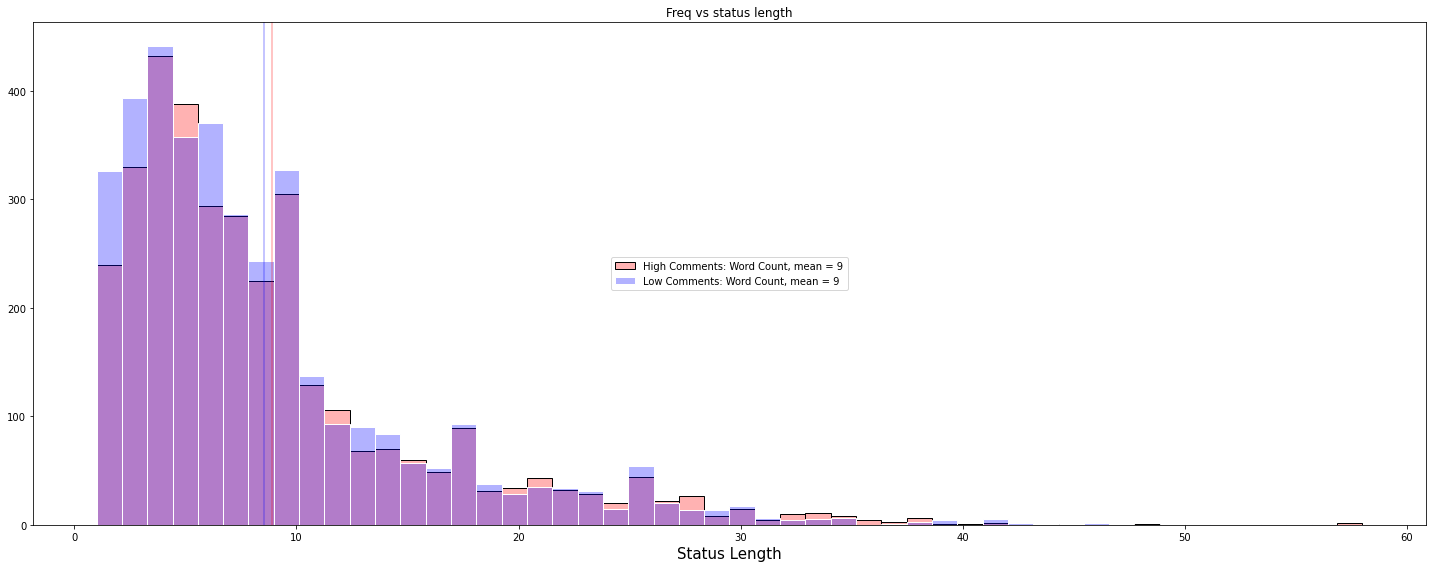

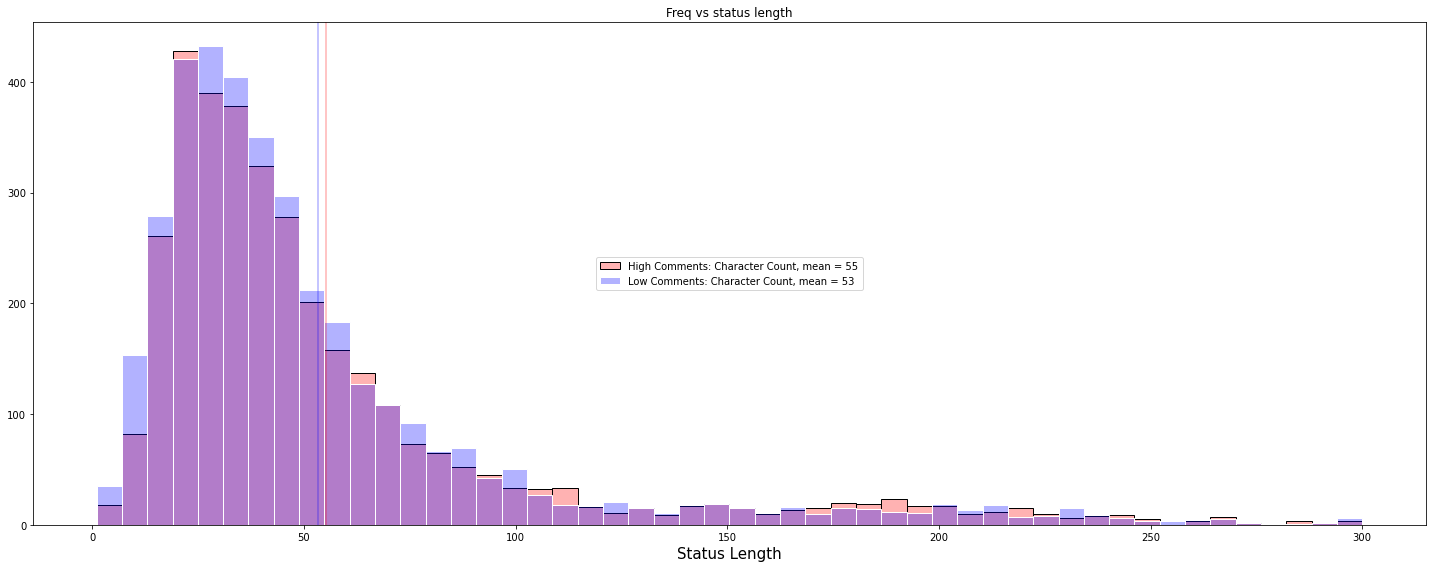

In [56]:
features = ['word_count', 'char_count']
labels = ['Word Count', 'Character Count']
color1 = (1,0,0,0.3)
color2 = (0,0,1,0.3)
target = df['commments_greater']
for i in range(len(features)):
    fig, ax = plt.subplots(figsize = (20,8))
    feature = features[i]
    bins = np.histogram(df[feature], bins=50)[1]
    lab = labels[i]
    avg_high_comments = df[target==1][feature].mean()
    avg_low_comments = df[target == 0][feature].mean()
    ax.hist(df[target==1][feature], bins = bins, label = f'High Comments: {lab}, mean = {round(avg_high_comments)}', color = color1,edgecolor='k');
    ax.hist(df[target==0][feature], bins = bins, label = f'Low Comments: {lab}, mean = {round(avg_low_comments)}', color = color2, edgecolor='w');
    ax.axvline(avg_high_comments, color = color1)
    ax.axvline(avg_low_comments, color = color2)

    ax.set_xlabel(f'Status Length', size=15)
    ax.set(title = f'Freq vs status length')
    ax.legend(loc='center');

# Modeling

In [57]:
cv = CountVectorizer(stop_words='english')

cv.fit(df['title'])
words_df = pd.DataFrame(cv.transform(df['title']).A, columns = cv.get_feature_names_out())
print(f'shape of words df = {words_df.shape}')
words_df.head()

shape of words df = (7121, 6062)


,00,000,00pm,01,01006069927,06,07,10,100,1000,...,หวย,าออนไลน,เครด,เว,แทงบอลออนไลน,โนออนไลน,먹튀검증,먹튀사이트,먹튀샵,토토사이트
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
words_df['000'].value_counts()

0    7117
1       4
Name: 000, dtype: int64

In [59]:
# k most common words
top_k = 25
words_df.sum().sort_values(ascending=False)[:top_k]

dominion       1416
card            902
cards           683
fan             529
game            453
kotw            386
online          333
prosperity      293
intrigue        293
village         281
expansion       271
ages            269
dark            268
seaside         250
question        249
play            247
new             244
adventures      237
games           210
empires         210
shelters        198
kingdom         196
hinterlands     195
colony          183
platinum        176
dtype: int64

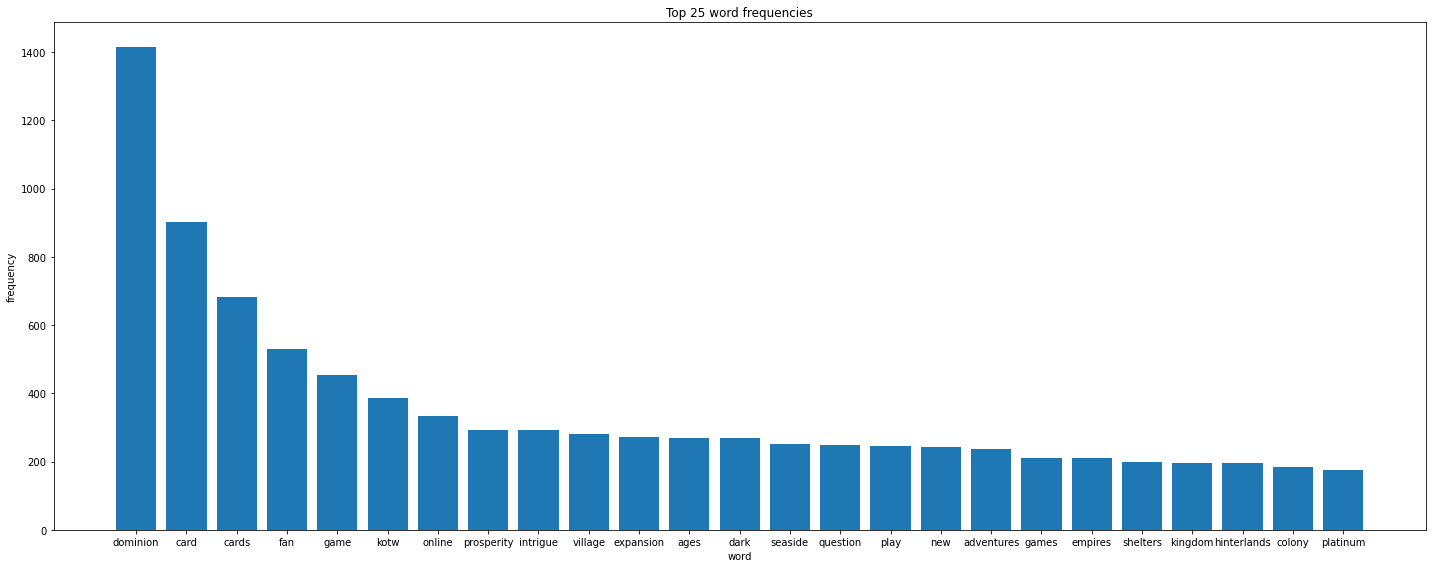

In [60]:

fig, ax = plt.subplots(figsize = (20,8))
ax.bar(x=words_df.sum().sort_values(ascending=False)[:top_k].index, height=words_df.sum().sort_values(ascending=False)[:top_k]);
ax.set(title = f'Top {top_k} word frequencies', xlabel = 'word', ylabel = 'frequency')
plt.show()

In [63]:
# excluding stopwords
cv_bigrams = CountVectorizer(ngram_range=(1,3), stop_words='english')
cv_bigrams.fit(df['title'])
X_train_bigrams = cv_bigrams.transform(df['title'])
pd.DataFrame(X_train_bigrams.A, columns=cv_bigrams.get_feature_names_out()).sum().sort_values(ascending = False)[:10]


dominion      1416
card           902
cards          683
fan            529
game           453
kotw           386
fan card       376
online         333
intrigue       293
prosperity     293
dtype: int64